<a href="https://colab.research.google.com/github/jhkr1/Practical-Al-Natural-Language-Processing/blob/main/Word_Representation_OneHotEncoding%2C_Euclidean_Distance%2C_Jaccard_index%2C_Cosine_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단어의 표현 (Word Representation)

## 1. 원-핫 인코딩(One-Hot Encoding)

### 1-1) 직접 구현

In [1]:
word_ls = ['원숭이','바나나','사과','개', '고양이']

In [8]:
from collections import defaultdict
import numpy as np

def one_hot_encode(word_ls):
  # 고유 단어와 인덱스를 매칭시켜주는 사전 생성
  word2id_dic = defaultdict(lambda:len(word2id_dic))
  # {단어 : 인덱스} 딕셔너리 구축
  for word in word_ls:
    word2id_dic[word]

  n_unique_words = len(word2id_dic) # 고유한 단어의 개수
  one_hot_vectors = np.zeros((len(word_ls), n_unique_words)) # 원핫-벡터를 만들기 위해 비어있는 벡터 생성

  for i, word in enumerate(word_ls):
    index = word2id_dic[word]
    one_hot_vectors[i, index] = 1

  return one_hot_vectors


In [9]:
one_hot_encode(word_ls)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### "코끼리"라는 단어가 추가된다면?


In [10]:
word_ls = ['원숭이', '바나나', '사과','코끼리']

In [11]:
one_hot_vectors = one_hot_encode(word_ls)
one_hot_vectors

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### 1-2) sklearn 활용

In [14]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [24]:
values = array(word_ls)
print('1. 문장을 배열로 만들기')
print(values)
print('='* 50)

label_enc = LabelEncoder()
int_enc = label_enc.fit_transform(values)
print("2. 배열에 LabelEncoder 적용하기")
print(int_enc)
print('='* 50)

# binary encode
onehot_enc = OneHotEncoder(sparse_output=False)
int_enc = int_enc.reshape(len(int_enc), 1)
print("3. LabelEncoder를 적용한 배열을 reshape 하기")
print(int_enc)
print('='* 50)

onehot_enc = onehot_enc.fit_transform(int_enc)
print("4.reshape한 배열에 다시 OneHotEncoder 적용시키기")
print(onehot_enc)
print('='* 50)

# one-hot encoding의 첫 번째 배열의 값을 역으로 산출
inverted = label_enc.inverse_transform([argmax(onehot_enc[0, :])])
print("5. 첫 번째 배열의 값을 역으로 산출하기")
print(inverted)

1. 문장을 배열로 만들기
['원숭이' '바나나' '사과' '코끼리']
2. 배열에 LabelEncoder 적용하기
[2 0 1 3]
3. LabelEncoder를 적용한 배열을 reshape 하기
[[2]
 [0]
 [1]
 [3]]
4.reshape한 배열에 다시 OneHotEncoder 적용시키기
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
5. 첫 번째 배열의 값을 역으로 산출하기
['원숭이']


## 2. 유사도 계산

### 2-1) 유클리디언 거리(Euclidean Distance)

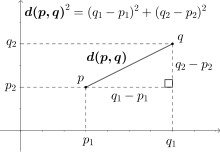

1.svg

In [25]:
word_embedding_dic = {
    '사과' : [1.0, 0.5],
    '바나나' : [0.9, 1.2],
    '원숭이' : [0.5, 1.5]
}

In [27]:
import numpy as np
def euclidean_dist(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.sqrt(np.sum((x-y)**2))

# 사과와 바나나의 코사인 유사도
euclidean_dist(word_embedding_dic['사과'], word_embedding_dic['바나나'])

np.float64(0.7071067811865475)

In [28]:
np.sqrt(np.power(1.0 - 0.9, 2.0) + np.power(0.5 - 1.2, 2.0))

np.float64(0.7071067811865475)

### 2-2) 자카드 유사도(Jaccard Index)

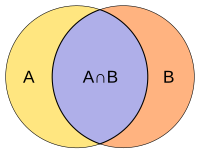

2.svg

In [30]:
s1 = '대부분 원숭이는 바나나를 좋아합니다.'
s2 = '코주부 원숭이는 바나나를 싫어합니다.'

token_s1 = s1.split()
token_s2 = s2.split()

union = set(token_s1).union(set(token_s2))

print(union)

intersection = set(token_s1).intersection(set(token_s2))

print(intersection)

print(len(intersection) / len(union))

{'원숭이는', '싫어합니다.', '바나나를', '좋아합니다.', '대부분', '코주부'}
{'원숭이는', '바나나를'}
0.3333333333333333


### 2-3) 코사인 유사도(Cosine Similarity)

* 두 벡터간의 유사도를 측정하는 방법 중 하나
* 두 벡터 사이의 코사인을 측정
* 0도 = 1, 90도 = 0, 180도 = -1 ==> 1에 가까울수록 유사도가 높음


3.svg

In [32]:
def cosine_similarity(x, y):
  # x와 y, 두 벡터의 코사인 유사도를 계산하는 함수
  nominator = np.dot(x, y) # 두 벡터의 내적 계산
  denominator = np.linalg.norm(x) * np.linalg.norm(y) # 벡터 x의 크기와 벡터 y의 크기를 곱한다.

  return nominator / denominator

In [33]:
# 사과와 바나나의 코사인 유사도
print(cosine_similarity(word_embedding_dic['사과'], word_embedding_dic['바나나']))
print(euclidean_dist(word_embedding_dic['사과'], word_embedding_dic['바나나']))


0.8944271909999159
0.7071067811865475


In [34]:
# 사과와 원숭이의 코사인 유사도
print(cosine_similarity(word_embedding_dic['사과'], word_embedding_dic['원숭이']))
print(euclidean_dist(word_embedding_dic['사과'], word_embedding_dic['원숭이']))

0.7071067811865475
1.118033988749895


In [35]:
# 바나나와 원숭이의 코사인 유사도
print(cosine_similarity(word_embedding_dic['바나나'], word_embedding_dic['원숭이']))
print(euclidean_dist(word_embedding_dic['바나나'], word_embedding_dic['원숭이']))

0.9486832980505138
0.5
